In [1]:
import pennylane as qml
from pennylane import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt

potrzebujesz 4 kubitów


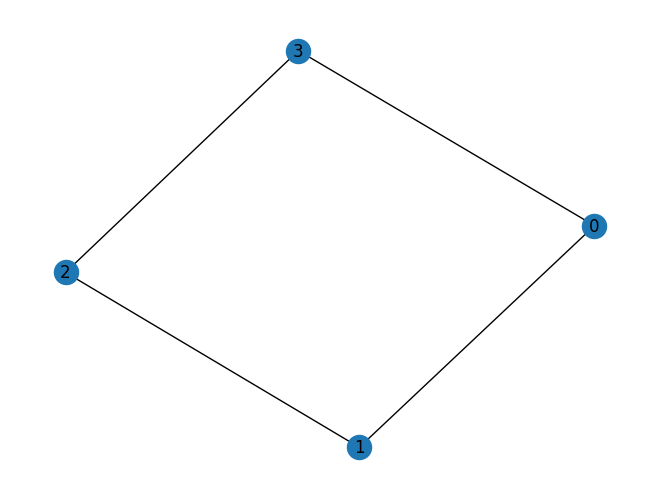

In [2]:
edges = [(0, 1), (1, 2),(2,3),(3,0)]
G = nx.Graph(edges)
n_edges = len(G.edges)
n_wires = len(G.nodes)
print(f"potrzebujesz {n_wires} kubitów")

nx.draw(G, with_labels=True)
plt.show()

In [3]:
def maxcut_hamiltonian(graph):
    coeffs = []
    obs = []
    for (i, j) in graph.edges:
        coeffs.append(0.5)
        obs.append(qml.PauliZ(i) @ qml.PauliZ(j))
    return qml.Hamiltonian(coeffs, obs)

In [4]:
H = maxcut_hamiltonian(G)

In [5]:
H.wires

<Wires = [0, 1, 3, 2]>

In [ ]:
dev = qml.device('default.qubit', wires = H.wires)

wires = H.wires

def circuit(params):

    n_params = int(len(params)/2)
    
    gammas = params[:n_params]
    
    betas = params[n_params:]
    # stan początkowy 
    for i in range(n_wires):
        qml.Hadamard(wires=i)
    
    for gamma, beta in zip(gammas, betas):
        # cost_h
        for (i,j) in G.edges:
            qml.CNOT(wires=[i,j])
            qml.RZ(-gamma, wires=j)
            qml.CNOT(wires=[i,j])
        # mixer
        for i in range(n_wires):
            qml.RX(2 * beta, wires=i)
    
    return qml.expval(H)

In [18]:
def cost(params):
    return circuit(params)

n_layers = 2

params = np.random.uniform(0, np.pi, size = 2 * n_layers, requires_grad=True)


In [19]:
circuit(params)

expval(0.5 * (Z(0) @ Z(1)) + 0.5 * (Z(0) @ Z(3)) + 0.5 * (Z(1) @ Z(2)) + 0.5 * (Z(2) @ Z(3)))

In [8]:
optimizer = qml.GradientDescentOptimizer()
epochs = 50

In [9]:
for epoch in range(epochs):
        params = optimizer.step(cost, params)

print("Optimal Parameters")
print(params)

/Users/seba/Documents/GitHub/qml2024/venv/lib/python3.11/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


TypeError: Can't find vector space for value expval(0.5 * (Z(0) @ Z(1)) + 0.5 * (Z(0) @ Z(3)) + 0.5 * (Z(1) @ Z(2)) + 0.5 * (Z(2) @ Z(3))) of type <class 'pennylane.measurements.expval.ExpectationMP'>. Valid types are dict_keys([<class 'autograd.core.SparseObject'>, <class 'list'>, <class 'tuple'>, <class 'dict'>, <class 'numpy.ndarray'>, <class 'float'>, <class 'numpy.longdouble'>, <class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>, <class 'complex'>, <class 'numpy.clongdouble'>, <class 'numpy.complex64'>, <class 'numpy.complex128'>, <class 'numpy.linalg.linalg.EigResult'>, <class 'numpy.linalg.linalg.EighResult'>, <class 'numpy.linalg.linalg.QRResult'>, <class 'numpy.linalg.linalg.SlogdetResult'>, <class 'numpy.linalg.linalg.SVDResult'>, <class 'pennylane.numpy.tensor.tensor'>])